In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [2]:
#load data
AH_data = pd.read_csv('tree_addhealth.csv')

data_clean = AH_data.dropna()

In [7]:
AH_data.shape,data_clean.shape

((6504, 25), (4575, 25))

In [8]:
#split into train and test
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [10]:
pred_train.shape,pred_test.shape,tar_train.shape

((2745, 24), (1830, 24), (2745,))

In [33]:
# build tree model
classifier = DecisionTreeClassifier(max_depth=4)
classifier = classifier.fit(pred_train,tar_train)

predictions = classifier.predict(pred_test)

In [34]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1395,   93],
       [ 202,  140]])

In [35]:
sklearn.metrics.accuracy_score(tar_test,predictions)

0.83879781420765032

In [36]:
#display decison tree
from sklearn import tree
from IPython.display import Image
from StringIO import StringIO

In [54]:
feature_name = ['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']
out = StringIO()
tree.export_graphviz(classifier,out_file = out,max_depth=3,feature_names=feature_name)
import pydotplus
graph = pydotplus.graph_from_dot_data(out.getvalue())

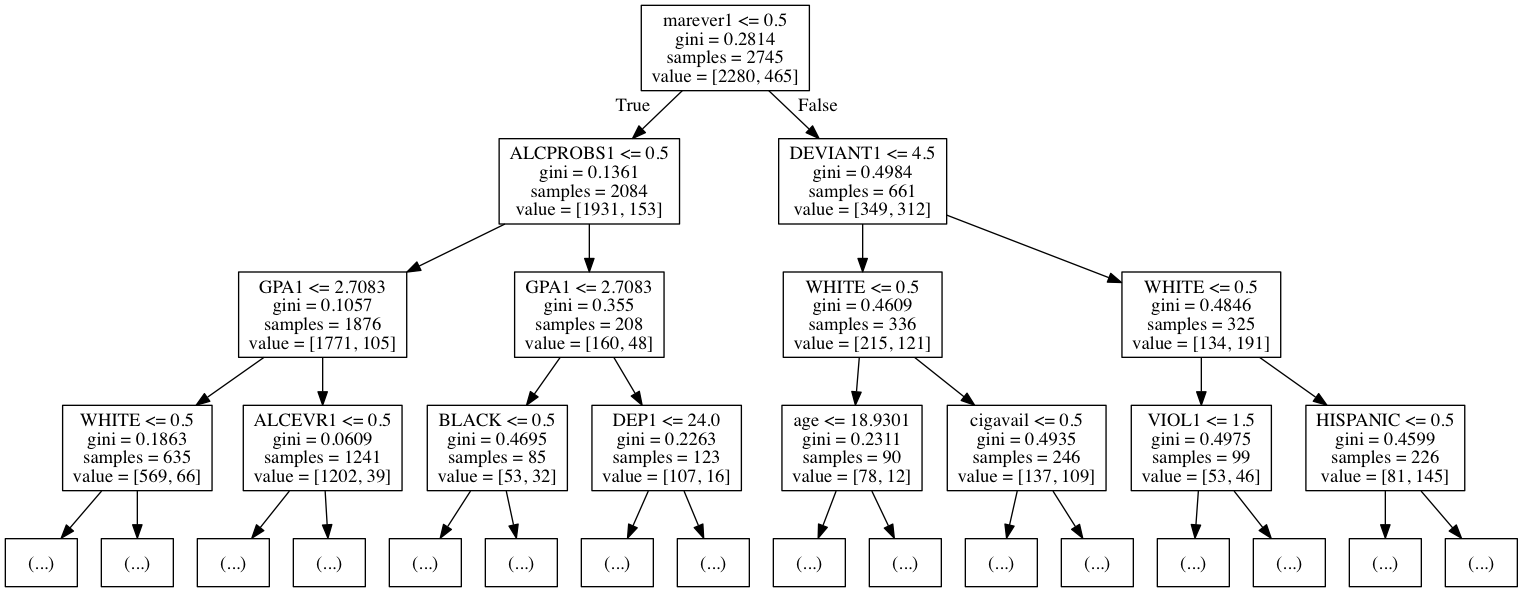

In [55]:
Image(graph.create_png())

In [51]:
graph.write_png('tree_result')

True